Notebook 1.2 Clustering

Objectif:

    - Sélectionner le nombre optimal de clusters (k)
    - Faire le clustering = trouver les centroids

Entrée:

    - data_filtered

Sortie:

    - Graph 1 méthode elbow (coude)



    - Graph 2 méthode silhouette 

Cet indice mesure la qualité de la séparation des clusters. Il varie de -1 à 1, où une valeur proche de 1 indique que les points sont bien regroupés au sein de leur cluster et bien séparés des autres clusters.
Interprétation : En observant ce graphique, vous recherchez le nombre de clusters K qui maximise la largeur moyenne de la silhouette. Cela suggère une bonne séparation et une bonne cohésion des clusters.

    - Graph 3 combinaison de WSS et de l'Indice de Silhouette
Ce graphique indique la qualité du clustering en combinant le WSS (Within-Cluster Sum of Squares), qui mesure la compacité des clusters, et l’indice de silhouette, qui évalue leur séparation. Les valeurs de WSS et de l’indice de silhouette sont d’abord normalisées entre 0 et 1. Le WSS normalisé est ensuite inversé pour que des clusters plus compacts obtiennent une valeur élevée. En additionnant ces deux indices, nous obtenons un indicateur combiné permettant de trouver un équilibre optimal entre compacité et séparation des clusters. Le pic de ce graphique indique le nombre de clusters K offrant le meilleur compromis entre ces deux critères.

    - Centroids (kmeans_results2022) pour le nombre de clusters (k) défini à l'aide des méthodes coude et silhouette 

    - orig_center et orig_scale, nécessaires dans le script clustering/exploration/qc_2022/test_realVoteIntent.R 


In [5]:
# Reproduction des premières cells de 1.1. 
library(dplyr)
library(ggplot2)
library(cluster)
library(factoextra)
library(tidyr)
library(ggcorrplot)
library(tibble)
library(gridExtra)



df_pilot1_2022 <- read.csv("/home/alexab/Dropbox/Ulaval/CLESSN/_SharedFolder_datagotchi-developpement/quebec_prov_2022/pilotes/pilote-1-quebec-prov-2022.csv")

# Les variables comment out ont été enlevées pour alléger le code
variables_int <- c(
   "male",
   "female",
   "ses_genderOther",
   "age34m",
   "age3554",
   "age55p",
   "langEn",
   "langFr",
   "ses_languageOther",
   "act_Gym",
   "act_TeamSport",
   "act_Run",
   "act_Yoga",
   "act_None",
   "act_Fishing",
   "act_Hunting",
   "act_VisitsMuseumsGaleries",
   "act_MotorizedOutdoorActivities",
   "act_Volunteering",
   "animal_cat",
   "animal_dog",
   "cons_brand_MaR",
   "cons_brand_Frip",
   "educBHS",
   "educCollege",
   "educUniv",
   "cons_redWineDrink",
   "cons_regBeers",
   "cons_cocktailsDrink",
   "cons_noDrink",
   "incomeLow",
   "incomeMid",
   "incomeHigh",
   "ses_dwelling_app",
   "ses_dwelling_detachedHouse",
   "act_transport_Car",
   "act_transport_Walk",
   "act_transport_PublicTransportation",
   "vehicule_PickUp",
   "vehicule_noCar",
   "immigrant",
   "cons_coffee_TimH",
   "cons_coffee_Starbucks",
   "cons_coffee_place_noCoffee",
   "app_noTattoo",
   "cons_low_Meat",
   "cons_mid_Meat",
   "cons_much_Meat",
   "ses_ethn_White",
   "ses_ethn_Black",
   "ses_ethn_Asiatique",
   "ses_hetero",
   "ses_gai",
   "ses_bisex"#,
 )


data_filtered <- df_pilot1_2022 %>%
  select(all_of(variables_int)) %>%
  drop_na()


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [6]:
# Normalisation des données 
data_scaled <- scale(data_filtered)

Warning messages:
1: did not converge in 10 iterations 
2: did not converge in 10 iterations 
3: did not converge in 10 iterations 
4: did not converge in 10 iterations 
5: did not converge in 10 iterations 


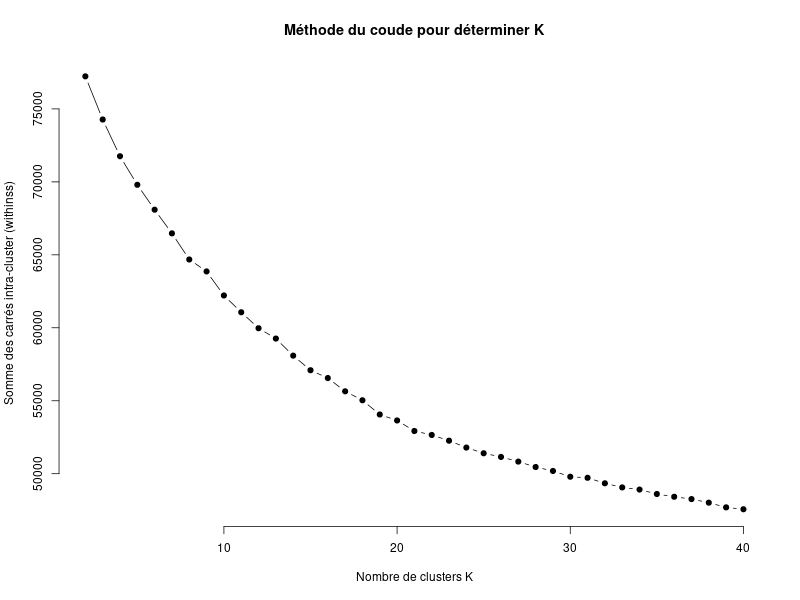

In [7]:
# Méthode du coude pour trouver nb de k optimal 
wss <- sapply(2:40, function(k){
  kmeans(data_scaled, centers = k, nstart = 25)$tot.withinss
})

# Graph 1: Tracer la courbe du coude
plot(2:40, wss, type = "b", pch = 19, frame = FALSE, 
     xlab = "Nombre de clusters K",
     ylab = "Somme des carrés intra-cluster (withinss)",
     main = "Méthode du coude pour déterminer K")


Warning messages:
1: did not converge in 10 iterations 
2: did not converge in 10 iterations 
3: did not converge in 10 iterations 
4: did not converge in 10 iterations 
5: did not converge in 10 iterations 
6: did not converge in 10 iterations 
7: did not converge in 10 iterations 


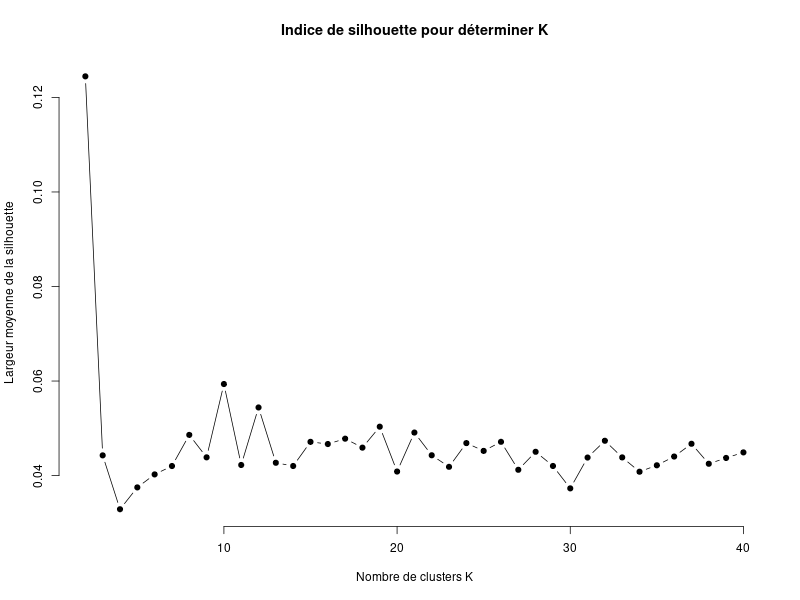

In [8]:
# Indice de silhouette pour différents k
sil_width <- sapply(2:40, function(k){
  km.res <- kmeans(data_scaled, centers = k, nstart = 25)
  ss <- cluster::silhouette(km.res$cluster, dist(data_scaled))
  mean(ss[, 3])
})

# Graph 2: Tracer la courbe de l'indice de silhouette
plot(2:40, sil_width, type = "b", pch = 19, frame = FALSE,
     xlab = "Nombre de clusters K",
     ylab = "Largeur moyenne de la silhouette",
     main = "Indice de silhouette pour déterminer K")

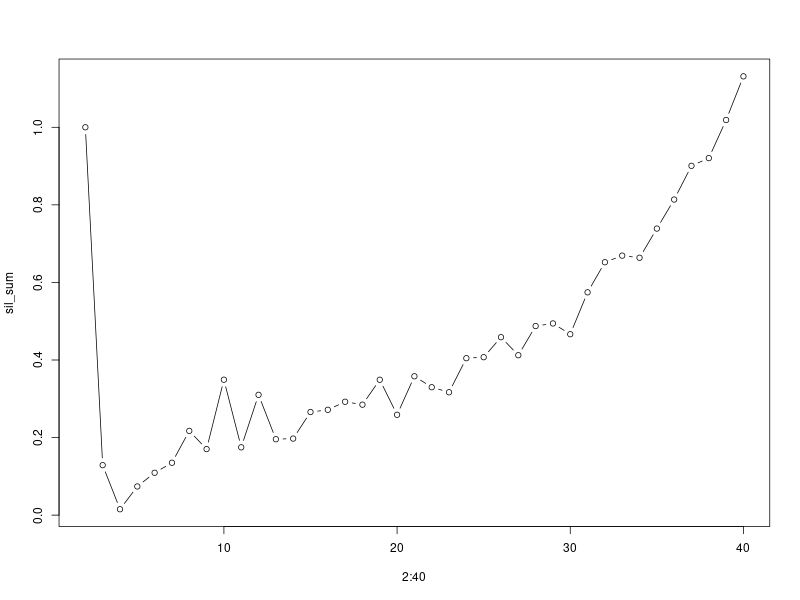

In [9]:
# WSS + Indice de Silhouette
wss_scaled <- (wss - min(wss)) / (max(wss) - min(wss))
sil_width_scaled <- (sil_width - min(sil_width)) / (max(sil_width) - min(sil_width))

wss_scaled_rev <- rev(wss_scaled)
sil_sum <- wss_scaled_rev + sil_width_scaled

# Graph 3: Combinaison de WSS et de l'Indice de Silhouette
plot(2:40, sil_sum, type = "b")

In [10]:
# Loop pour appliquer k-means selon le nombre de k (dans le vecteur) 
for (i in c(2, 3, 5, 6, 7, 8, 9, 10, 11, 15, 16)){
  set.seed(123)  # Pour rendre les résultats reproductibles
  kmeans_result <- kmeans(data_scaled, centers = i, nstart = 25)
  # Ajouter les clusters aux données d'origine
  data_filtered[[paste0("cluster_", i)]] <- kmeans_result$cluster
}

Le nombre de clusters a été déterminé, oui avec l'aide de ces indicateurs, mais surtout de manière qualitative/manuelle. 

En effet, j'ai fait la description des clusters pour différents k à l'aide d'une loop qui a produit les graphiques. Ensuite, je notais l'évolution des différents clusters selon le nombre de k. 

La loop et la fonction se trouvent dans le script 3-2022_description.R

Les graphiques et les notes leur étant associées se trouvent dans _SharedFolder_datagotchi_federal_2024/clustering/graph/2022/réduit/description. 

Les graphs et notes pour k = 8 sont dans /2022_8 , k = 9 dans /2022_9, k = 10 dans /2022_10 et k = 11 dans /2022_11.

Les graphiques finaux (k = 11) ont été mis au propre dans des scripts distincts (voir qc_2022/description/ pour le code).
k = 11 ne semble pas être la solution optimale, mais il me permettait de conserver des clusters intéressants. 

In [ ]:
# Fonction pour la description des clusters. Se trouve aussi dans opubliqr::describe_clusters()

describe_clusters <- function(data, variables_to_describe, cluster_var){
  data$cluster_var <- data[[cluster_var]]
  ### variables to dummy
  non_numeric_vars <- variables_to_describe[!sapply(data[,variables_to_describe], is.numeric)]
  if (!purrr::is_empty(non_numeric_vars)) {
    df_dummy_only <- data |> 
      select(all_of(non_numeric_vars)) |> 
      fastDummies::dummy_columns(
        select_columns = non_numeric_vars,
        omit_colname_prefix = TRUE,
        remove_selected_columns = TRUE
      ) |> 
      janitor::clean_names()
    variables_to_describe <- c(variables_to_describe[!variables_to_describe %in% non_numeric_vars], names(df_dummy_only))
    df_description <- cbind(data, df_dummy_only) |> 
      tidyr::pivot_longer(
        cols = all_of(variables_to_describe),
        names_to = "variable",
        values_to = "value"
      )
  } else {
      df_description <- data |> 
        tidyr::pivot_longer(
          cols = all_of(variables_to_describe),
          names_to = "variable",
          values_to = "value"
        )
  }
  df_mean_all <- df_description |> 
    group_by(variable) |> 
    summarise(
      mean_value = mean(value),
      sd_value = sd(value)
    )
  df_mean_by_cluster <- df_description |> 
    group_by(cluster_var, variable) |> 
    summarise(mean_cluster = mean(value)) %>% 
    left_join(
      ., df_mean_all, by = "variable"
    ) |> 
    mutate(z_score = (mean_cluster - mean_value) / sd_value)
  return(df_mean_by_cluster)
}

La prochaine étape est encore un vecteur contenant les variables d'intérêt/à décrire. J'imagine que ce n'est pas la meilleure façon de procéder, étape très redondante dans plusieurs de mes scripts.

In [ ]:
# Variable à décrire 
variables_to_describe <- c(
  "male",
  "female",
  "ses_genderOther",
  "age34m",
  "age3554",
  "age55p",
  "langEn",
  "langFr",
  "ses_languageOther",
  "act_Gym",
  "act_TeamSport",
  "act_Run",
  "act_Yoga",
  "act_None",
  "act_Fishing",
  "act_Hunting",
  "act_VisitsMuseumsGaleries",
  "act_MotorizedOutdoorActivities",
  "act_Volunteering",
  "animal_cat",
  "animal_dog",
  "cons_brand_MaR",
  "cons_brand_Frip",
  "educBHS",
  "educCollege",
  "educUniv",
  "cons_redWineDrink",
  "cons_regBeers",
  "cons_cocktailsDrink",
  "cons_noDrink",
  "incomeLow",
  "incomeMid",
  "incomeHigh",
  "ses_dwelling_app",
  "ses_dwelling_detachedHouse",
  "act_transport_Car",
  "act_transport_Walk",
  "act_transport_PublicTransportation",
  "vehicule_PickUp",
  "vehicule_noCar",
  "immigrant",
  "cons_coffee_TimH",
  "cons_coffee_Starbucks",
  "cons_coffee_place_noCoffee",
  "app_noTattoo",
  "cons_low_Meat",
  "cons_mid_Meat",
  "cons_much_Meat",
  "ses_ethn_White",
  "ses_ethn_Black",
  "ses_ethn_Asiatique",
  "ses_hetero",
  "ses_gai",
  "ses_bisex"
)  

In [ ]:
# Préparation pré boucle

## Chemin du dossier où enregistrer les graphiques
output_dir <- "/home/alexab/Dropbox/Ulaval/CLESSN/datagotchi_federal_2024/_SharedFolder_datagotchi_federal_2024/clustering/graph/2022/réduit/description"

## Charger les bibliothèques nécessaires
library(dplyr)
library(ggplot2)
library(forcats)

## Appliquer la fonction de description
df_mean_by_cluster <- describe_clusters(
  data_filtered,
  variables_to_describe = variables_to_describe,
  cluster_var = "cluster_11" # définir le k qu'on souhaite analyser/décrire (pour 2022, de 8 à 11)
)

## Limiter les scores z entre -2 et 2. 
#L'idée est qu'un z_score à 2 est très significatif donc pas besoin de l'info post 2. Logique valide ou non? 
df_mean_by_cluster <- df_mean_by_cluster %>%
  mutate(z_score_limited = ifelse(z_score > 2, 2, ifelse(z_score < -2, -2, z_score)))

df_mean_by_cluster <- df_mean_by_cluster %>%
  mutate(
    variable = case_when(
      variable == "male" ~ "Homme",
      variable == "female" ~ "Femme",
      variable == "ses_genderOther" ~ "Autre genre",
      variable == "age34m" ~ "Moins de 34 ans",
      variable == "age3554" ~ "35 à 54 ans",
      variable == "age55p" ~ "55 ans et plus",
      variable == "langEn" ~ "Anglais",
      variable == "langFr" ~ "Français",
      variable == "ses_languageOther" ~ "Autre langue",
      variable == "act_Gym" ~ "Gym",
      variable == "act_TeamSport" ~ "Sports d'équipe",
      variable == "act_Run" ~ "Course",
      variable == "act_Yoga" ~ "Yoga",
      variable == "act_None" ~ "Aucune activité",
      variable == "act_Fishing" ~ "Pêche",
      variable == "act_Hunting" ~ "Chasse",
      variable == "act_VisitsMuseumsGaleries" ~ "Visites musées/galeries",
      variable == "act_MotorizedOutdoorActivities" ~ "Activités motorisées",
      variable == "act_Volunteering" ~ "Bénévolat",
      variable == "animal_cat" ~ "Chat",
      variable == "animal_dog" ~ "Chien",
      variable == "cons_brand_MaR" ~ "Magasins à rayons",
      variable == "cons_brand_Frip" ~ "Friperie",
      variable == "educBHS" ~ "Secondaire",
      variable == "educCollege" ~ "Collégial",
      variable == "educUniv" ~ "Universitaire",
      variable == "cons_redWineDrink" ~ "Vin rouge",
      variable == "cons_regBeers" ~ "Bières régulières",
      variable == "cons_cocktailsDrink" ~ "Cocktails",
      variable == "cons_noDrink" ~ "Ne boit pas d'alcool",
      variable == "incomeLow" ~ "Revenu faible",
      variable == "incomeMid" ~ "Revenu moyen",
      variable == "incomeHigh" ~ "Revenu élevé",
      variable == "ses_dwelling_app" ~ "Appartement",
      variable == "ses_dwelling_detachedHouse" ~ "Maison individuelle",
      variable == "act_transport_Car" ~ "Voiture",
      variable == "act_transport_Walk" ~ "Marche",
      variable == "act_transport_PublicTransportation" ~ "Transport public",
      variable == "vehicule_PickUp" ~ "Pick-up",
      variable == "vehicule_noCar" ~ "Aucun véhicule",
      variable == "immigrant" ~ "Immigrant",
      variable == "cons_coffee_TimH" ~ "Café Tim Hortons",
      variable == "cons_coffee_Starbucks" ~ "Café Starbucks",
      variable == "cons_coffee_place_noCoffee" ~ "Ne boit pas de café",
      variable == "app_noTattoo" ~ "Pas de tatouage",
      variable == "cons_low_Meat" ~ "Faible conso. de viande",
      variable == "cons_mid_Meat" ~ "Conso. modérée de viande",
      variable == "cons_much_Meat" ~ "Conso. élevée de viande",
      variable == "ses_ethn_White" ~ "Blanc(he)",
      variable == "ses_ethn_Black" ~ "Noir(e)",
      variable == "ses_ethn_Asiatique" ~ "Asiatique",
      variable == "ses_hetero" ~ "Hétérosexuel(le)",
      variable == "ses_gai" ~ "Gai(e)",
      variable == "ses_bisex" ~ "Bisexuel(le)",
      TRUE ~ "Autre"  # Au cas où des variables hors liste se glissent
    )
  )

## Obtenir la liste des clusters uniques
clusters <- unique(df_mean_by_cluster$cluster_var)

In [ ]:
# La BOUCLE

for(cluster_id in clusters){
  # Filtrer les données pour le cluster actuel
  df_cluster <- df_mean_by_cluster %>%
    filter(cluster_var == cluster_id)
  
  # Réordonner les variables par score z absolu
  df_cluster <- df_cluster %>%
    mutate(variable = fct_reorder(variable, abs(z_score), .desc = TRUE))
  
  # Inverser l'ordre des niveaux pour que les variables avec le score z absolu le plus élevé soient en haut
  df_cluster$variable <- fct_rev(df_cluster$variable)
  
# Ajouter une colonne pour la couleur en fonction du signe du z_score
df_cluster <- df_cluster %>%
  mutate(color = ifelse(z_score_limited >= 0, "#26aec6", "#eb1616"))


# Créer le graphique avec une ligne entre 0 et le point
graph <- ggplot(df_cluster, aes(x = z_score_limited, y = variable)) +
  # Lignes entre 0 et les points
  geom_segment(aes(x = 0, xend = z_score_limited, y = variable, yend = variable), 
               color = "grey", size = 1) +  # Épaisseur augmentée
  # Points avec couleur conditionnelle
  geom_point(aes(color = color), size = 3) +  # Points plus grands
  # Ligne verticale pour 0
  geom_vline(xintercept = 0, linetype = "dashed") +
  # Limites sur les axes
  coord_cartesian(xlim = c(-2, 2)) +
  # Personnalisation du thème
  clessnize::theme_clean_light() +
  theme(axis.text.y = element_text(size = 10)) +  # Texte plus grand
  # Étiquettes des axes et titre
  xlab("Score z") +
  ylab(NULL) +
  # Utilisation des couleurs pour les points
  scale_color_identity() +
    ggtitle(paste("Scores z des variables pour le cluster", cluster_id))
  
  # Enregistrer le graphique
  output_file <- file.path(output_dir, paste0("2022_11cluster_", cluster_id, ".png"))
  ggsave(filename = output_file, plot = graph, width = 8, height = 6)
}

In [11]:
# Centroids pour le nb de k choisi (ici 11)
kmeans_result11 <- kmeans(data_scaled, centers = 11, nstart = 25)
#saveRDS(kmeans_result11, file = "kmeans_results2022.rds")

Dans ce code, orig_center et orig_scale sont les attributs extraits de l'objet data_scaled, qui contient les données normalisées. Ces attributs sont générés lorsque la fonction scale() est utilisée pour normaliser les données. Voici ce qu'ils représentent.

orig_center: Ce vecteur contient les moyennes des colonnes de données d'origine (avant la normalisation). Ces moyennes sont utilisées pour centrer les données autour de zéro. Lors de la normalisation, chaque valeur dans une colonne est soustraite par la moyenne de cette colonne, ce qui donne des données centrées sur zéro.

orig_scale: Ce vecteur contient les écarts-types des colonnes de données d'origine. Ces écarts-types sont utilisés pour mettre à l'échelle les données afin qu'elles aient une variance égale à 1. Lors de la normalisation, chaque valeur dans une colonne (après avoir été centrée) est divisée par l'écart-type de cette colonne.

Ces vecteurs seront utilisées 

In [12]:
# Extract & save the center/scale
orig_center <- attr(data_scaled, "scaled:center")
orig_scale  <- attr(data_scaled, "scaled:scale")
saveRDS(orig_center, file = "kmeans_orig_center.rds")
saveRDS(orig_scale,  file = "kmeans_orig_scale.rds")

Le script original 2-2022_pca_clustering.R comporte des graphiques pour visualiser en 2D et 3D les clusters selon différents k. Je ne crois pas que cela est nécessaire de les reproduire ici. 